# Confirmed Cases & Recovery Trends of COVID-19 Among the Most Affected Countries & Kenya (April 2020)

In this notebook we will conduct explanatory analysis on Covid19 data focusing on the month of April. Key questions we will try to answer are:
1. Which countries had the highest confirmed cases of Covid19 and what was their daily cases trend in April?
2. What was the Covid19 recovery rates among the top 8 most affected countries in the month of April?
3. What was the outlook and trends in Kenya in the month of April?

In [2]:
#Importing the necessarily libraries to carry out the EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing datasets

In [3]:
#Saving the raw data of the covid19 recovered cases & confirmed cases to their respective variables
#This data is updated on a daily basis from data source as per the respective url's: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
recovered_csv="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
confirmed_csv="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [4]:
#Reading in the data to dataframes
recovered_timeseries_df=pd.read_csv(recovered_csv)
confirmed_timeseries_df=pd.read_csv(confirmed_csv)

In [5]:
#Inspecting the data sets
recovered_timeseries_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,331,345,397,421,458,468,472,502,558,558
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,519,531,543,570,595,605,620,627,650,654
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1872,1936,1998,2067,2197,2323,2467,2546,2678,2841
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,472,493,499,514,521,526,537,545,550,550
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,11,11,11,11,11,11,11,13,13,13


In [6]:
confirmed_timeseries_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,789,795,803,820,832,842,850,856,868,872
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,747,748,750,751,751,752,752,754,755,755
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,35,35,35,36,36,36,43,43,45,45


In [7]:
#Confirming that the column names in the two datasets are the same i.e the data structures are the same
confirmed_timeseries_df.columns==recovered_timeseries_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [8]:
#Since the columns in the df's are the same we can come up with a function to massage the data
#we shall drop columns Province/State,Lat,Long as we don't require it in our analysis
def reshape_data(recovered_timeseries_df,confirmed_timeseries_df):
    confirmed=confirmed_timeseries_df.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Confirmed_cases').drop(columns=['Province/State','Lat','Long'])
    recovered=recovered_timeseries_df.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Recovered_cases').drop(columns=['Province/State','Lat','Long'])
    confirmed['Date']=pd.to_datetime(confirmed['Date'])
    recovered['Date']=pd.to_datetime(recovered['Date'])
    recovered.set_index("Date",inplace=True)
    confirmed.set_index("Date",inplace=True)
    recovered.index = recovered.index.strftime('%d/%m/%Y')
    confirmed.index = confirmed.index.strftime('%d/%m/%Y')
        
    return (confirmed,recovered)



In [9]:
#Wrangling the raw data and unpacking the massaged data to new dataframes
Confirmed_data,Recovered_data=reshape_data(recovered_timeseries_df,confirmed_timeseries_df)

In [10]:
#Inspecting the unpacked data
Confirmed_data.head()

,Country/Region,Confirmed_cases
22/01/2020,Afghanistan,0
22/01/2020,Albania,0
22/01/2020,Algeria,0
22/01/2020,Andorra,0
22/01/2020,Angola,0


In [11]:
Recovered_data.head()

,Country/Region,Recovered_cases
22/01/2020,Afghanistan,0
22/01/2020,Albania,0
22/01/2020,Algeria,0
22/01/2020,Andorra,0
22/01/2020,Angola,0


In [12]:
Confirmed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29526 entries, 22/01/2020 to 11/05/2020
Data columns (total 2 columns):
Country/Region     29526 non-null object
Confirmed_cases    29526 non-null int64
dtypes: int64(1), object(1)
memory usage: 692.0+ KB


In [13]:
Recovered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27972 entries, 22/01/2020 to 11/05/2020
Data columns (total 2 columns):
Country/Region     27972 non-null object
Recovered_cases    27972 non-null int64
dtypes: int64(1), object(1)
memory usage: 655.6+ KB


## Countries with the most confirmed cases & daily trends in April

In [14]:
#Filtering the countries with a high number of confirmed cases registered for the month of April 2020
High_Cases_Confirmed=Confirmed_data['01/04/2020':'30/04/2020'].groupby("Country/Region").max().sort_values(by="Confirmed_cases",ascending=False).head(5)


In [15]:
High_Cases_Confirmed.index

Index(['US', 'Spain', 'Italy', 'United Kingdom', 'France'], dtype='object', name='Country/Region')

In [16]:
#Create list of the countries with the highest no of confirmed cases as at end of April
Countries_List=High_Cases_Confirmed.index.to_list()

In [17]:
Countries_List

['US', 'Spain', 'Italy', 'United Kingdom', 'France']

In [18]:
#Filtering the confirmed cases data with Countries list for the month of April 2020 & summing over Confirmed_cases for any cases  of duplicated Country/Region per day
def April_data(data,count_column):
    data1=data[data["Country/Region"].isin (Countries_List)]
    data1=data1['01/04/2020':'30/04/2020']
    data1 = data1.groupby([data1.index,'Country/Region']).agg({count_column: 'sum'})
    data1.reset_index(inplace=True)
    data1.set_index('level_0',inplace=True)
    data1.index.rename('Date',inplace=True)
    return data1


In [19]:
Highest_Cases_data=April_data(Confirmed_data,'Confirmed_cases')

In [20]:
Highest_Cases_data.head()

,Country/Region,Confirmed_cases
Date,,
01/04/2020,France,57749
01/04/2020,Italy,110574
01/04/2020,Spain,104118
01/04/2020,US,213242
01/04/2020,United Kingdom,29865


In [21]:
Highest_Recovery_data=April_data(Recovered_data,'Recovered_cases')

<function matplotlib.pyplot.show(*args, **kw)>

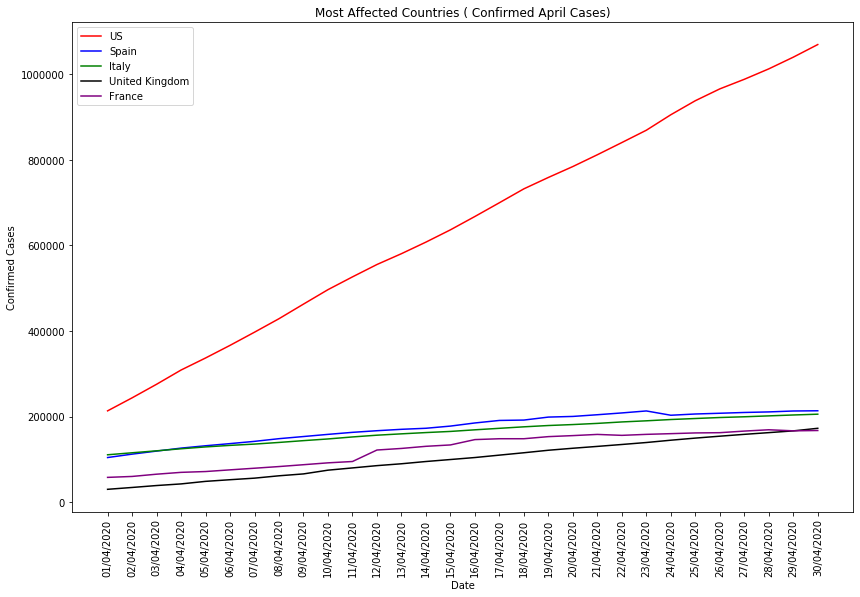

In [22]:
Color=['Red','Blue','Green','Black','Purple']
c=0
fig,ax=plt.subplots(figsize=(14,9))
for i in Countries_List:
    a=Highest_Cases_data[Highest_Cases_data['Country/Region']==i]
    ax.plot(a.index,a['Confirmed_cases'],color=Color[c])
    c+=1
ax.legend(Countries_List,loc='best')
plt.xticks(rotation='vertical')
ax=plt.gca()
plt.title('Most Affected Countries ( Confirmed April Cases)')
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show
    

### Observation
Based on the above, it is clear that US has the highest confirmed cases and since the US cases as at 01/04/2020 are almost equal to the highest record among the other countries as at 30/04/2020, it would be more beneficial if we have two plots one for the US data & another for the other 4 countries

#### Us confirmed cases in the month of April

In [23]:
#Filtering US cases
US_cases=Highest_Cases_data[Highest_Cases_data['Country/Region']=='US']

<function matplotlib.pyplot.show(*args, **kw)>

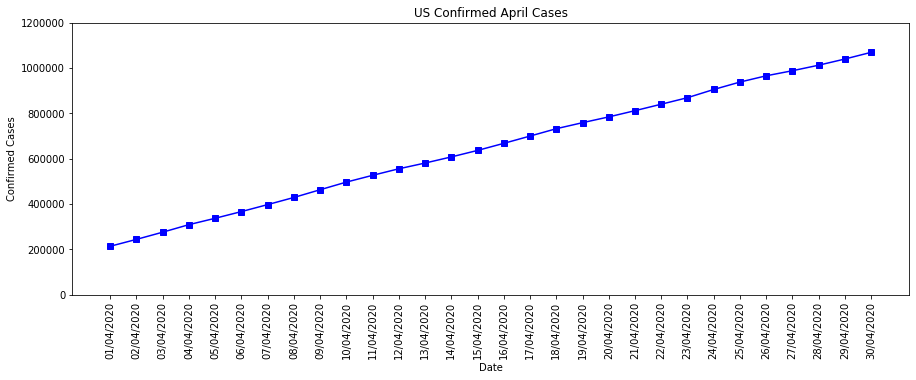

In [24]:
#US April cases plot
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(US_cases.index,US_cases['Confirmed_cases'],color='blue',marker='s')
plt.xticks(rotation='vertical')
ax.set_ylim([0,1200000])
plt.title('US Confirmed April Cases')
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show


#### Observation

From the graph we can observe that the confirmed cases have increased linearly in the US in the month of April, with an estimate of around 30,000 new cases per day.

### Plot of the other countries with the highest cases for the month of April

In [25]:
#Subsetting the Countries_List data to exclude US
Countries_List_2=Countries_List[1:]

In [26]:
Countries_List_2

['Spain', 'Italy', 'United Kingdom', 'France']

<function matplotlib.pyplot.show(*args, **kw)>

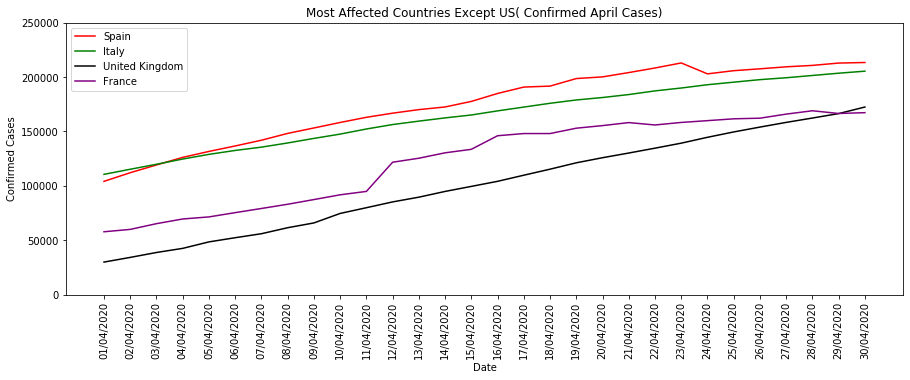

In [27]:
#Plot
Color=['Red','Green','Black','Purple']
c=0
fig,ax=plt.subplots(figsize=(15,5))
for i in Countries_List_2:
    a=Highest_Cases_data[Highest_Cases_data['Country/Region']==i]
    ax.plot(a.index,a['Confirmed_cases'],color=Color[c])
    c+=1
ax.legend(Countries_List_2,loc='best')
plt.xticks(rotation='vertical')
ax=plt.gca()
plt.title('Most Affected Countries Except US( Confirmed April Cases)')
ax.set_ylim([0,250000])
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show

#### Observations

From the above plot we can observe that:
Generally there seems to be an almost linear growth of confirmed cases amongst the four countries; with Spain cases significantly going down on 23/04/2020 and cases in France spiking on 12/04/2020


## Recovery Rates Among the top 8 Affected Countries in the month of April

In [28]:
#Summing for values with duplicated region/Country
Confirmed_data_April=Confirmed_data.groupby([Confirmed_data.index,'Country/Region']).agg({'Confirmed_cases': 'sum'})

In [29]:
Confirmed_data_April=Confirmed_data_April.loc['01/04/2020':'30/04/2020']

In [30]:
Confirmed_Country_Max = Confirmed_data_April.groupby(['Country/Region']).max()

In [31]:
Confirmed_Country_Max.reset_index(inplace=True)

In [32]:
Confirmed_Country_Max.head()

,Country/Region,Confirmed_cases
0,Afghanistan,4687
1,Albania,872
2,Algeria,5891
3,Andorra,755
4,Angola,45


In [33]:
#Summing for values with duplicated region/Country
Recovered_data_April = Recovered_data.groupby([Recovered_data.index,'Country/Region']).agg({'Recovered_cases': 'sum'})

In [34]:
Recovered_data_April=Recovered_data_April.loc['01/04/2020':'30/04/2020']

In [35]:
#Getting the maximum recovery cases
Recovered_Country_Max = Recovered_data_April.groupby(['Country/Region']).max()

In [36]:
Recovered_Country_Max.reset_index(inplace=True)

In [37]:
Recovered_Country_Max.head()

,Country/Region,Recovered_cases
0,Afghanistan,558
1,Albania,654
2,Algeria,2841
3,Andorra,550
4,Angola,13


In [38]:
Confirmed_Recovered_data=Confirmed_Country_Max

In [39]:
#Adding a Recovered_cases column to create a new dataframe
Confirmed_Recovered_data['Recovered_cases']=Recovered_Country_Max['Recovered_cases']

In [40]:
Confirmed_Recovered_data.head()

,Country/Region,Confirmed_cases,Recovered_cases
0,Afghanistan,4687,558
1,Albania,872,654
2,Algeria,5891,2841
3,Andorra,755,550
4,Angola,45,13


In [41]:
#Getting the recovery rates per country column

In [42]:
Confirmed_Recovered_data['Recovery rate']=Confirmed_Recovered_data['Recovered_cases']/Confirmed_Recovered_data['Confirmed_cases']

In [43]:
Confirmed_Recovered_data.head()

,Country/Region,Confirmed_cases,Recovered_cases,Recovery rate
0,Afghanistan,4687,558,0.119053
1,Albania,872,654,0.750000
2,Algeria,5891,2841,0.482261
3,Andorra,755,550,0.728477
4,Angola,45,13,0.288889


##### Visualizing the recovery rate of the Most affected countries in the world(8 Countries)

In [44]:
Countries_Most_Affected=Confirmed_Recovered_data.groupby("Country/Region").max().sort_values(by="Confirmed_cases",ascending=False).head(8)

In [45]:
Countries_Most_Affected.reset_index(inplace=True)

In [46]:
Countries_Most_Affected.head()

,Country/Region,Confirmed_cases,Recovered_cases,Recovery rate
0,US,1347881,232733,0.172666
1,Spain,227436,137139,0.602978
2,United Kingdom,224332,1015,0.004525
3,Russia,221344,39801,0.179815
4,Italy,219814,106587,0.484896


Text(0.5, 1.0, 'Recovery Rates for Countries Most Affected')

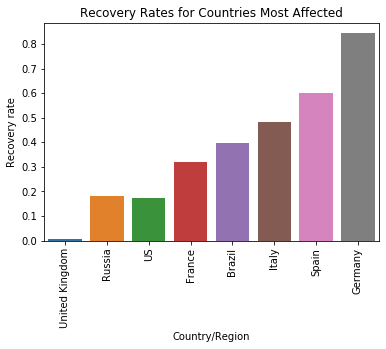

In [47]:
sns.barplot(x='Country/Region',y='Recovery rate',data=Countries_Most_Affected,order=['United Kingdom','Russia','US','France','Brazil','Italy','Spain','Germany'])
plt.xticks(rotation='vertical')
plt.title("Recovery Rates for Countries Most Affected")

We observe that in the month of of April UK had the lowest recovery rate and Germany had the highest recovery rate. Although this is the case, it is important to note that several factors have an impact on the recovery rates and this may be different from country to country. Some of this factors may include:
1. Demographics
2. Age distribution among the confirmed cases
3. Health system capacity
4. Rates at which tests are being carried out
5. Population size

e.t.c


## Outlook and Trends of Covid19 in Kenya in the month of April

In [48]:
#Subseting the Kenyan data
Kenyan_Confirmed=Confirmed_data[Confirmed_data['Country/Region']=='Kenya']

In [49]:
Kenyan_Confirmed=Kenyan_Confirmed['01/04/2020':'30/04/2020']

In [50]:
Kenyan_Confirmed.head()

,Country/Region,Confirmed_cases
01/04/2020,Kenya,81
02/04/2020,Kenya,110
03/04/2020,Kenya,122
04/04/2020,Kenya,126
05/04/2020,Kenya,142


In [51]:
Kenyan_Confirmed.reset_index(inplace=True)

In [52]:
Kenyan_Confirmed.head()

,index,Country/Region,Confirmed_cases
0,01/04/2020,Kenya,81
1,02/04/2020,Kenya,110
2,03/04/2020,Kenya,122
3,04/04/2020,Kenya,126
4,05/04/2020,Kenya,142


In [53]:
Kenyan_Confirmed.rename(columns={'index':'Day'},inplace=True)

In [54]:
Kenyan_Confirmed.head()

,Day,Country/Region,Confirmed_cases
0,01/04/2020,Kenya,81
1,02/04/2020,Kenya,110
2,03/04/2020,Kenya,122
3,04/04/2020,Kenya,126
4,05/04/2020,Kenya,142


In [55]:
#Plot of confirmed cases over_time

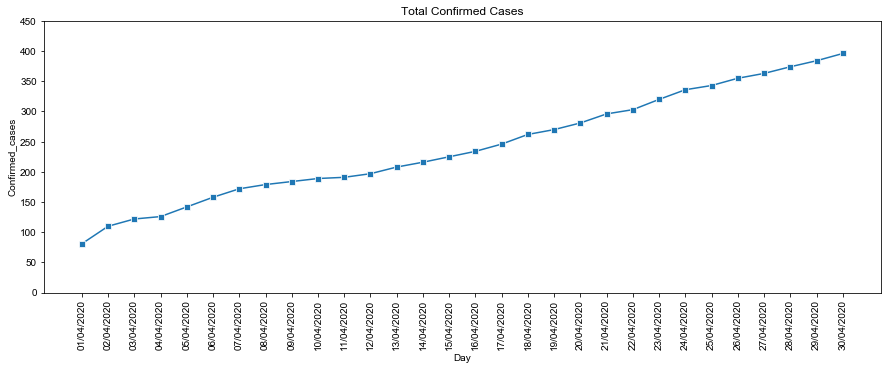

In [56]:
fig,ax=plt.subplots(figsize=(15,5))
sns.lineplot(y='Confirmed_cases',x='Day',ax=ax,data=Kenyan_Confirmed,marker='s')
plt.xticks(rotation="vertical")
ax.set_ylim([0,450])
sns.set_style("darkgrid")
plt.title("Total Confirmed Cases")
plt.show()


We observe that like most of the other countries confirmed cases in Kenya rose lineraly over the month of April. Although this is the case, these cases are mostly affected by the number of sample tests conducted per day. It is important to note that testing is also limited to the availability of testing kits which are on high demand all over the world amidst their less supply.

In [57]:
Kenyan_Confirmed['Daily_Confirmed_cases']=Kenyan_Confirmed['Confirmed_cases'].diff()

In [58]:
Kenyan_Confirmed.head()

,Day,Country/Region,Confirmed_cases,Daily_Confirmed_cases
0,01/04/2020,Kenya,81,NaN
1,02/04/2020,Kenya,110,29.0
2,03/04/2020,Kenya,122,12.0
3,04/04/2020,Kenya,126,4.0
4,05/04/2020,Kenya,142,16.0


In [59]:
#Dropping the first day
Kenyan_Daily_Confirmed=Kenyan_Confirmed.dropna(axis=0)

In [60]:
Kenyan_Daily_Confirmed.head()

,Day,Country/Region,Confirmed_cases,Daily_Confirmed_cases
1,02/04/2020,Kenya,110,29.0
2,03/04/2020,Kenya,122,12.0
3,04/04/2020,Kenya,126,4.0
4,05/04/2020,Kenya,142,16.0
5,06/04/2020,Kenya,158,16.0


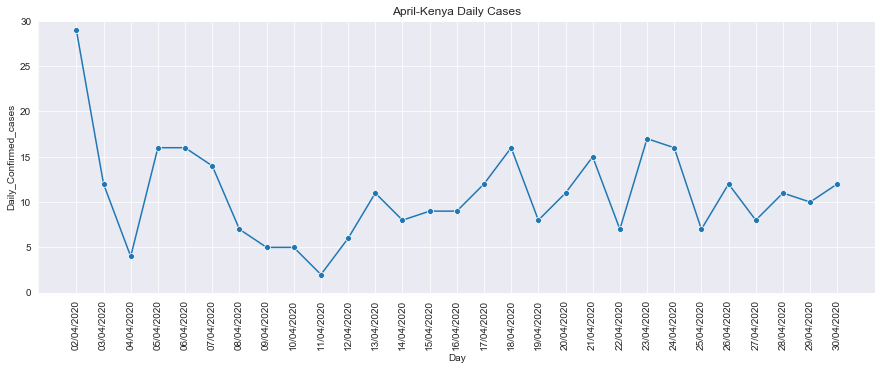

In [61]:
fig,ax=plt.subplots(figsize=(15,5))
sns.lineplot(y='Daily_Confirmed_cases',x='Day',data=Kenyan_Daily_Confirmed,marker='o')
plt.xticks(rotation="vertical")
ax.set_ylim([0,30])
sns.set_style("darkgrid")
plt.title("April-Kenya Daily Cases")
plt.show()

In [62]:
#Kenya testing data scrapped from daily press briefings by the Ministry of Health Kenya

In [63]:
Dates=Kenyan_Confirmed['Day'].to_list()

In [64]:
#Converting the dates to a list
#It is worth noting that some days had missing information of test data thus we shall drop those days

In [65]:
#Dropping days with missing test data

In [66]:
Dates=Dates[1:]

In [67]:
Test_Missing=['06/04/2020','08/04/2020','16/04/2020','17/04/2020','20/04/2020','25/04/2020','26/04/2020','27/04/2020','28/04/2020']
Test_Dates=[item for item in Dates if item not in Test_Missing]

In [68]:
Kenyan_tested=[662,362,372,530,696,308,504,491,766,674,694,803,1115,1330,545,707,668,946,508,777]

In [69]:
d={'Test Days':Test_Dates,'Count Sample Tests':Kenyan_tested}

In [70]:
df_Tests=pd.DataFrame(d)

In [71]:
df_Tests

,Test Days,Count Sample Tests
0,02/04/2020,662
1,03/04/2020,362
2,04/04/2020,372
3,05/04/2020,530
4,07/04/2020,696
5,09/04/2020,308
6,10/04/2020,504
7,11/04/2020,491
8,12/04/2020,766
9,13/04/2020,674


In [72]:
#Visualizing the same

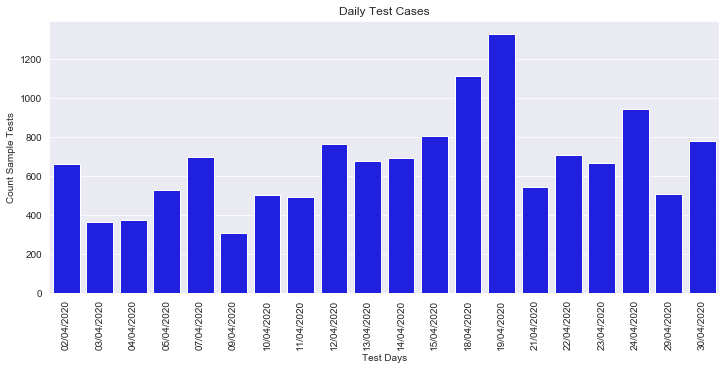

In [73]:
fig,ax=plt.subplots(figsize=(12,5))
sns.barplot(y='Count Sample Tests',x='Test Days',data=df_Tests,color='b')
plt.xticks(rotation="vertical")
sns.set_style("darkgrid")
plt.title("Daily Test Cases")
plt.show()

#### Count_test_samples vs Confirmed cases

In [74]:
Kenya_x=Kenyan_Confirmed.set_index('Day')
Kenya_x=Kenya_x.drop(['01/04/2020','06/04/2020','08/04/2020','16/04/2020','17/04/2020','20/04/2020','25/04/2020','26/04/2020','27/04/2020','28/04/2020'])
Kenya_x.reset_index(inplace=True)
Kenya_x=Kenya_x.rename(columns={'Day':'Test Days'})
Kenya_x=pd.merge(df_Tests,Kenya_x,on='Test Days')
Kenya_x.head()

,Test Days,Count Sample Tests,Country/Region,Confirmed_cases,Daily_Confirmed_cases
0,02/04/2020,662,Kenya,110,29.0
1,03/04/2020,362,Kenya,122,12.0
2,04/04/2020,372,Kenya,126,4.0
3,05/04/2020,530,Kenya,142,16.0
4,07/04/2020,696,Kenya,172,14.0


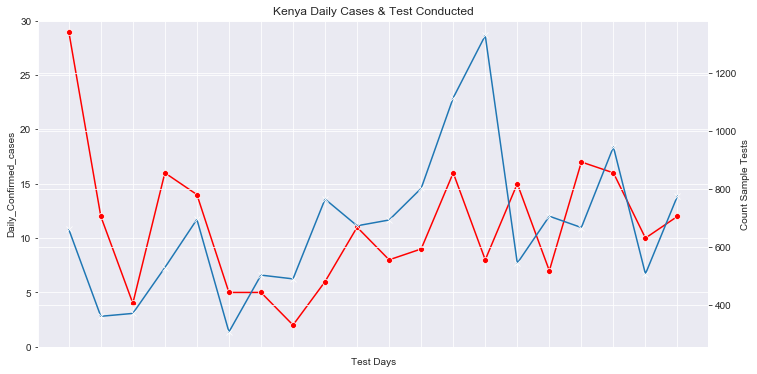

In [75]:
fig,ax=plt.subplots(figsize=(12,6))
ax2=ax.twinx()
sns.lineplot(y='Daily_Confirmed_cases',x='Test Days',data=Kenya_x,ax=ax,marker='o',color='red')
sns.lineplot(y='Count Sample Tests',x='Test Days',data=Kenya_x,ax=ax2,marker='x')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax.set_ylim([0,30])
sns.set_style("darkgrid")
plt.title("Kenya Daily Cases & Test Conducted")
plt.show()

### Observations

The inconistency in the number of tested conducted per day is due to the limited supply of testing kits and the testing policies applied in Kenya.It is important to note that as at April 30th Mass testing had not taken place in Kenya. Also we note that there is really no correlation between the daily confirmed cases and the sample tests conducted per day. It is important to note that both the number of cases is affected by the test samples conducted, currently in Kenya the population tested is that of people in quarantine or those with a high probability of being infected.Maybe the numbers might change if mass testing is done, but we shall wait and see. 